## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [2]:
df = pd.read_csv("../data/raw/dataset.csv")
df_severity = pd.read_csv("../data/raw/Symptom-severity.csv")
df_precautions = pd.read_csv("../data/raw/symptom_precaution.csv")
df_description = pd.read_csv("../data/raw/symptom_Description.csv")

In [3]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [5]:
df_precautions.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [6]:
df_description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


*The dataset.csv is the main dataset others are just an extension of it, the next step will be to find missing values of the external datasets (precautions, description ...) and merge them to the original one*

## Manipulation datasets

### Removing white spaces

In [7]:
for col in df.columns:
    df[col] = df[col].str.strip()
    
df_severity["Symptom"] = df_severity["Symptom"].str.strip()
    
for col in df_description.columns:
    df_description[col] = df_description[col].str.strip()
    
for col in df_precautions.columns:
    df_precautions[col] = df_precautions[col].str.strip()

### Null Values extra datasets

In [8]:
# Checking for missing values
df_severity.isnull().sum()

Symptom    0
weight     0
dtype: int64

In [9]:
df_description.isnull().sum()

Disease        0
Description    0
dtype: int64

In [10]:
df_precautions.isnull().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64

I will just replace these null values with no precautions

In [11]:
df_precautions = df_precautions.fillna("no precautions")

In [12]:
df_precautions.isnull().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    0
Precaution_4    0
dtype: int64

## Visualization

In [13]:
# Check Balanced Data
df_grouped = df.groupby("Disease").count()
df_grouped["count"] = df_grouped["Symptom_1"]
df_grouped = df_grouped[["count"]]

<AxesSubplot:xlabel='Disease'>

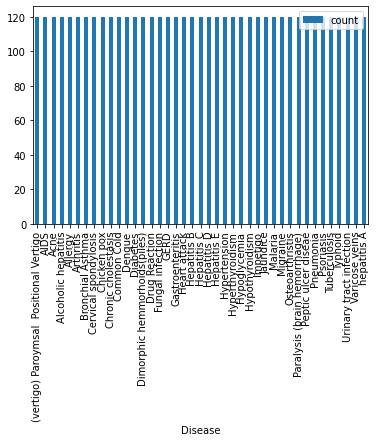

In [14]:
df_grouped.plot.bar()

The data is balanced

### Manipumate original dataset and replace symptoms with weights

I will add a weight 0 (no symptoms for the null values we have in our dataset)

In [15]:
df_severity.loc[133] = ["no symptoms",0]

# one symptom is duplicated after some research I decided to drop the one with lower weight
df_severity = df_severity.drop(index=117)
df_severity.set_index("Symptom",inplace = True)


In [16]:
# Change name in dataset as available in df_severity

df = df.replace("dischromic _patches","dischromic_patches")
df = df.replace("spotting_ urination","spotting_urination")
df = df.replace("foul_smell_of urine","foul_smell_ofurine")

In [17]:
df_severity

,weight
Symptom,
itching,1
skin_rash,3
nodal_skin_eruptions,4
continuous_sneezing,4
shivering,5
...,...
blister,4
red_sore_around_nose,2
yellow_crust_ooze,3


Now that our data is cleaned, and prepare, we can finally start merging 

<h5> No feature engineering, only manipulation of the available data to prepare our dataset for the next step </h5>

### Merge Datasets

In [21]:
# Merge datasets with the original
df = pd.merge(df,df_precautions)
df = pd.merge(df,df_description)

# Saving new dataset
df_t = df.iloc[:2000]
df_test = df.iloc[2000:,1:-5]
df_t.to_csv("../data/processed/merged_data.csv",index=False)
df_test.to_csv("../data/processed/merged_data_t.csv",index=False)
df_severity.to_csv("../data/processed/Symptom-severity.csv")


In [22]:
df_test

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
2000,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,NaN,NaN,NaN,NaN,NaN,NaN
2001,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,NaN,NaN,NaN,NaN,NaN,NaN
2002,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,NaN,NaN,NaN,NaN,NaN,NaN
2003,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,NaN,NaN,NaN,NaN,NaN,NaN
2004,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4796,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4797,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4798,skin_rash,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
